In [2]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

import seaborn as sns
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [4]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train.drop(["index","label"],axis=1)
Y_train = train['label']

test_index=test['index']
test=test.drop(['index'],1)


In [7]:
 X_train =X_train.values.reshape(-1,28,28,1)
 test= test.values.reshape(-1,28,28,1)
 

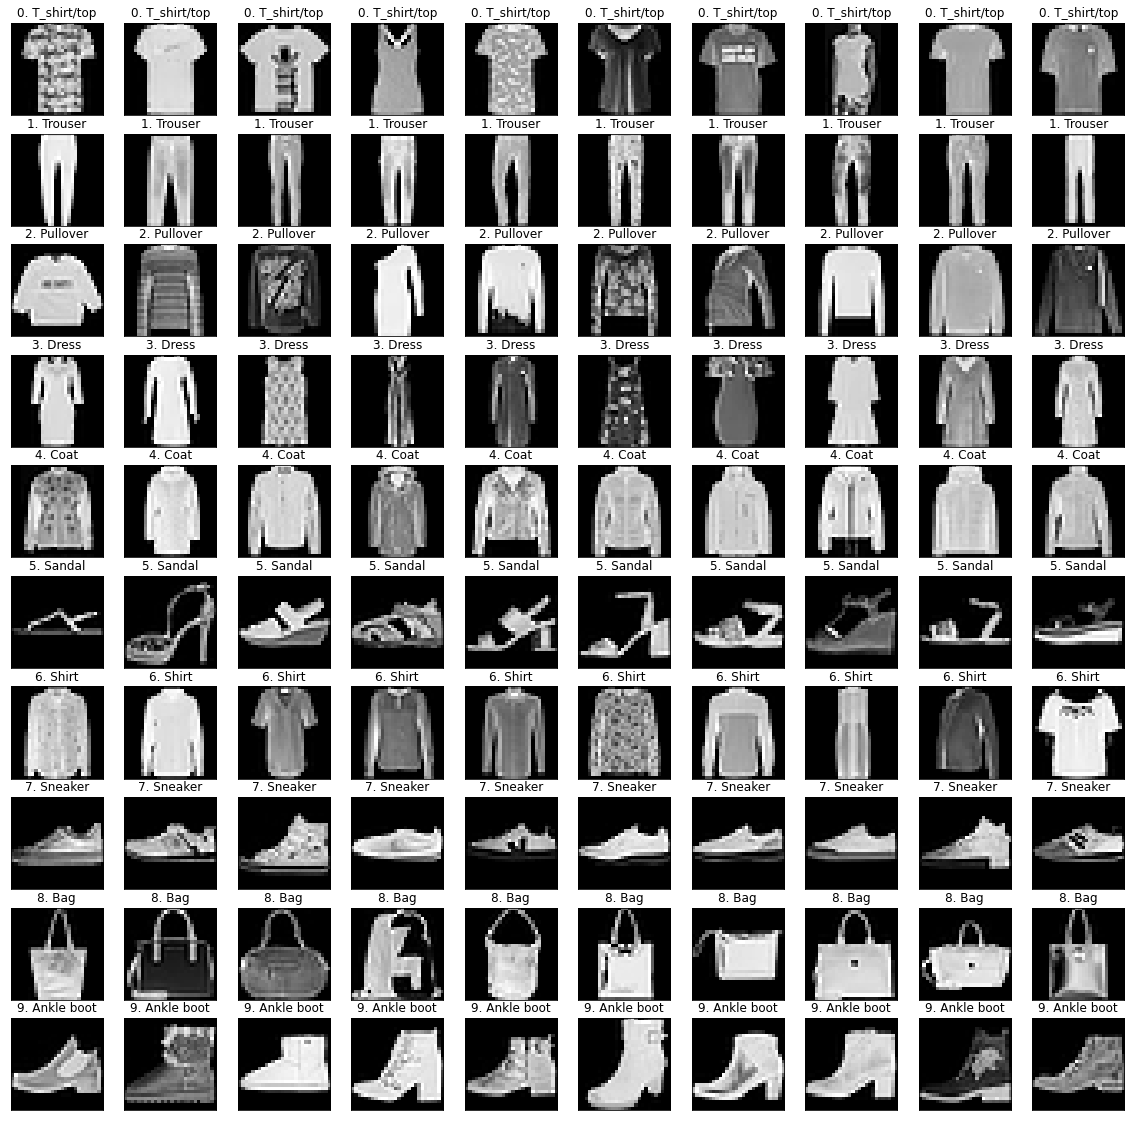

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(20, 20))

for t in range(10):
    XX = X_train[Y_train == t]
    YY = Y_train[Y_train == t].reset_index()['label']
    for i in range(10):
        plt.subplot(10, 10, t*10 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(XX[i][:,:,0], cmap='gray')
        label_index = int(YY[i])
        plt.title('{}. {}'.format(t, class_names[label_index]))
plt.show()

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
test_size=0.2,
random_state=100)


In [10]:
print("{}".format(X_train.shape[0]))
print("{}".format(X_val.shape[0]))

48000
12000


In [11]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255

Y_train= np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)


In [12]:

#모델 설정
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                294944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [15]:
MODEL_DIR = "./model/"

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=30, 
                    batch_size=200, 
                    verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_val, Y_val)[1]))


Epoch 00001: val_loss improved from inf to 0.42993, saving model to ./model\01-0.4299.hdf5

Epoch 00002: val_loss improved from 0.42993 to 0.35822, saving model to ./model\02-0.3582.hdf5

Epoch 00003: val_loss improved from 0.35822 to 0.34770, saving model to ./model\03-0.3477.hdf5

Epoch 00004: val_loss improved from 0.34770 to 0.29562, saving model to ./model\04-0.2956.hdf5

Epoch 00005: val_loss improved from 0.29562 to 0.27473, saving model to ./model\05-0.2747.hdf5

Epoch 00006: val_loss improved from 0.27473 to 0.26866, saving model to ./model\06-0.2687.hdf5

Epoch 00007: val_loss improved from 0.26866 to 0.25807, saving model to ./model\07-0.2581.hdf5

Epoch 00008: val_loss improved from 0.25807 to 0.25155, saving model to ./model\08-0.2516.hdf5

Epoch 00009: val_loss improved from 0.25155 to 0.24707, saving model to ./model\09-0.2471.hdf5

Epoch 00010: val_loss improved from 0.24707 to 0.23997, saving model to ./model\10-0.2400.hdf5

Epoch 00011: val_loss improved from 0.23997

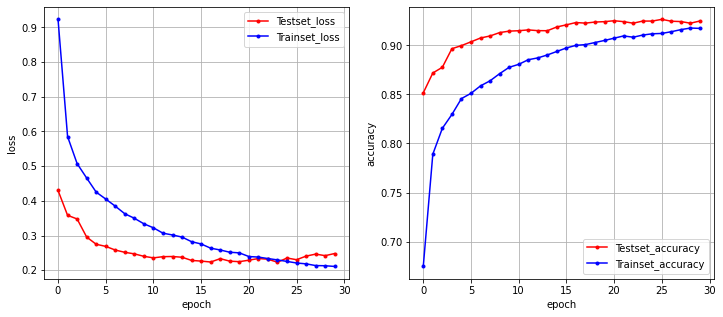

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c="red", label='Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
ax1.legend(loc='upper right')
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')


# 정확도
y_vaccuracy = history.history['val_accuracy']

# 학습셋
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c="red", label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c='blue', label = 'Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
ax2.legend(loc='lower right')
ax2.grid()

ax2.set(xlabel='epoch', ylabel='accuracy')

# draw gridlines
ax2.grid(True)
plt.show()